https://www.kaggle.com/datasets/kkhandekar/all-datasets-for-practicing-ml

https://www.kaggle.com/code/daniilkrasnoproshin/ps-s4e6-ensemble-learning/comments

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Class_Ionosphere.csv")
df.head()

,RRD1,RRD2,RRD3,RRD4,RRD5,RRD6,RRD7,RRD8,RRD9,RRD10,RRD11,RRD12,RRD13,RRD14,RRD15,RRD16,RRD17,RRD18,RRD19,RRD20,RRD21,RRD22,RRD23,RRD24,RRD25,RRD26,RRD27,RRD28,RRD29,RRD30,RRD31,RRD32,RRD33,RRD34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
pd.set_option("display.max_columns", None)

In [6]:
df["Class"].value_counts()

Class
g    225
b    126
Name: count, dtype: int64

In [7]:
df["Class"] = df["Class"].map({"g" : 0, "b" : 1})

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [9]:
len(df.columns)

35

In [11]:
df["RRD1"].value_counts()

RRD1
1    313
0     38
Name: count, dtype: int64

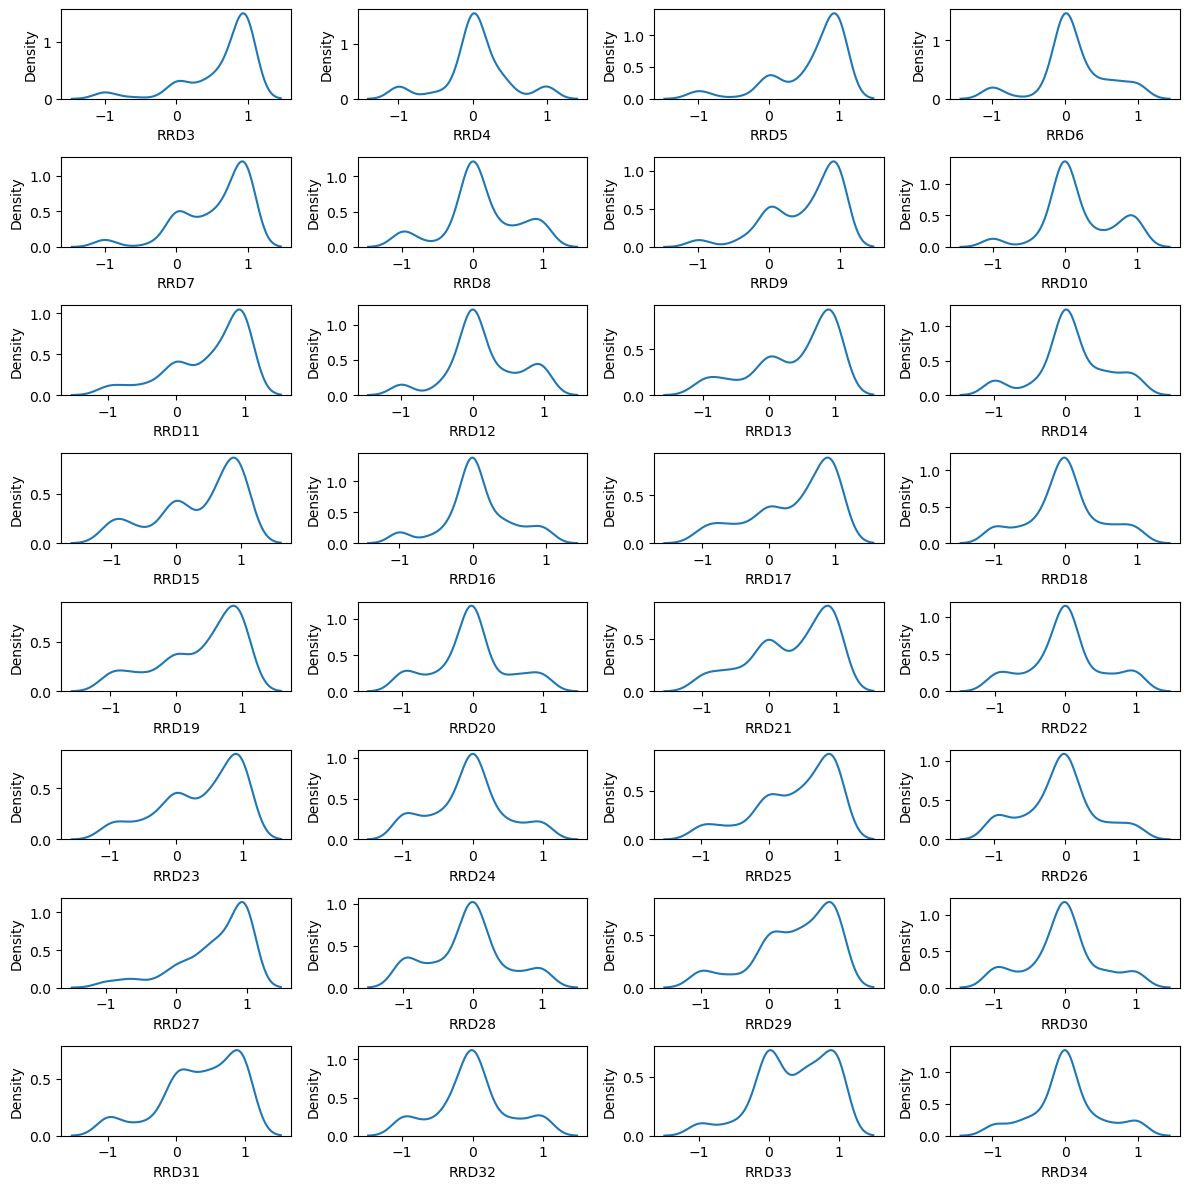

In [13]:
cols_num = df.drop(columns = ["RRD1", "RRD2", "Class"]).columns.to_list()
fig, axis = plt.subplots(nrows = 8, ncols = 4, figsize = (12, 12))
k = 0
for i in range(8):
    for j in range(4):
        sns.kdeplot(x = df[cols_num[k]], ax = axis[i][j])
        k = k + 1
plt.tight_layout()
plt.show()

In [14]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import PowerTransformer

In [18]:
pt = PowerTransformer()
X_train[df.drop("Class", axis = 1).columns.to_list()] = pt.fit_transform(X_train)
X_test[df.drop("Class", axis = 1).columns.to_list()] = pt.transform(X_test)

In [38]:
lr = LogisticRegression(class_weight = "balanced")
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

<Axes: >

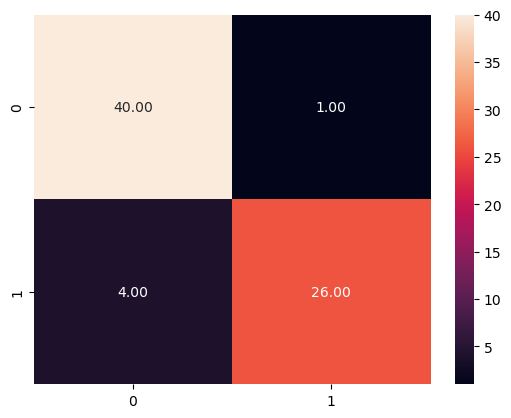

In [41]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot = True, fmt = ".2f")

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators = 20000, n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20000, n_jobs=-1)

<Axes: >

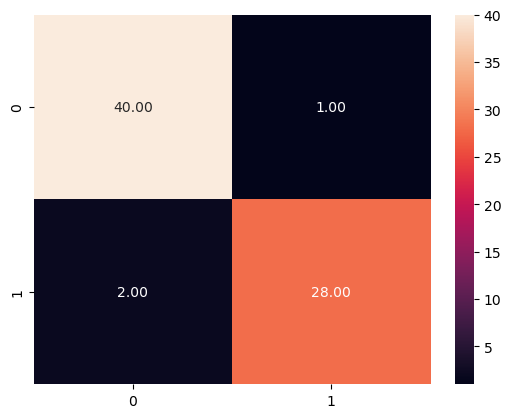

In [55]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), annot = True, fmt = ".2f")

In [59]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, AdaBoostClassifier

In [73]:
from imblearn.ensemble import EasyEnsembleClassifier
import xgboost

In [91]:
estimators = [
    ("gbc", GradientBoostingClassifier()),
    ("etc", ExtraTreesClassifier(class_weight = {0 : 0.4, 1 : 0.6})),
    ("hgbc", HistGradientBoostingClassifier()),
    ("abc", AdaBoostClassifier()),
    ("rfr", RandomForestClassifier(class_weight = {0 : 0.4, 1 : 0.6})),
    ("eec", EasyEnsembleClassifier()),
    ("xgb", xgboost.XGBClassifier(class_weight = {0 : 0.4, 1 : 0.6}))
]
vr = VotingClassifier(estimators = estimators, voting = "soft", n_jobs = -1)

In [92]:
vr.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('etc',
                              ExtraTreesClassifier(class_weight={0: 0.4,
                                                                 1: 0.6})),
                             ('hgbc', HistGradientBoostingClassifier()),
                             ('abc', AdaBoostClassifier()),
                             ('rfr',
                              RandomForestClassifier(class_weight={0: 0.4,
                                                                   1: 0.6})),
                             ('eec', EasyEnsembleClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 n_jobs=-1, voting='soft')

<Axes: >

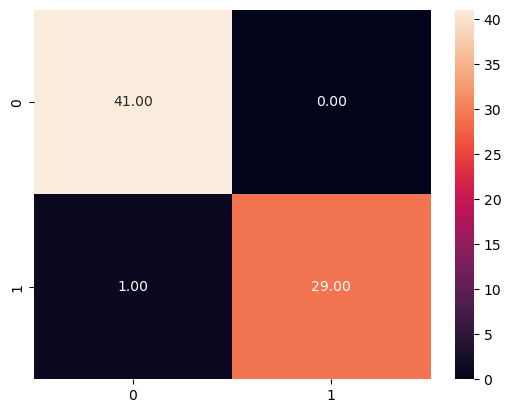

In [93]:
sns.heatmap(confusion_matrix(y_test, vr.predict(X_test)), annot = True, fmt = ".2f")

In [94]:
from sklearn.ensemble import StackingClassifier

In [105]:
estimators_layer1 = [
    ("gbc", GradientBoostingClassifier()),
    ("etc", ExtraTreesClassifier()),
    ("hgbc", HistGradientBoostingClassifier()),
    ("abc", AdaBoostClassifier()),
    ("rfr", RandomForestClassifier(class_weight = {0 : 0.4, 1 : 0.6})),
    ("eec", EasyEnsembleClassifier()),
    ("xgb", xgboost.XGBClassifier(class_weight = {0 : 0.4, 1 : 0.6}))
]
layer1 = StackingClassifier(estimators = estimators_layer1, final_estimator = EasyEnsembleClassifier(), n_jobs = -1)

In [112]:
estimators_layer2 = [
    ("layer1", layer1),
    ("gbc", GradientBoostingClassifier()),
    ("etc", ExtraTreesClassifier()),
    ("hgbc", HistGradientBoostingClassifier()),
    ("abc", AdaBoostClassifier()),
    ("rfr", RandomForestClassifier()),
    ("eec", EasyEnsembleClassifier()),
    ("xgb", xgboost.XGBClassifier(class_weight = {0 : 0.4, 1 : 0.6}))
]
layer2 = StackingClassifier(estimators = estimators_layer2, final_estimator = EasyEnsembleClassifier(), n_jobs = -1)

In [113]:
layer2.fit(X_train, y_train)

StackingClassifier(estimators=[('layer1',
                                StackingClassifier(estimators=[('gbc',
                                                                GradientBoostingClassifier()),
                                                               ('etc',
                                                                ExtraTreesClassifier()),
                                                               ('hgbc',
                                                                HistGradientBoostingClassifier()),
                                                               ('abc',
                                                                AdaBoostClassifier()),
                                                               ('rfr',
                                                                RandomForestClassifier(class_weight={0: 0.4,
                                                                                                     1: 0.6})),
                                                               ('eec',
                                                                EasyEnsembleClassifier()),
                                                               ('xgb',
                                                                XGBClassifier(base_score=None,
                                                                              booster=No...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=EasyEnsembleClassifier(), n_jobs=-1)

<Axes: >

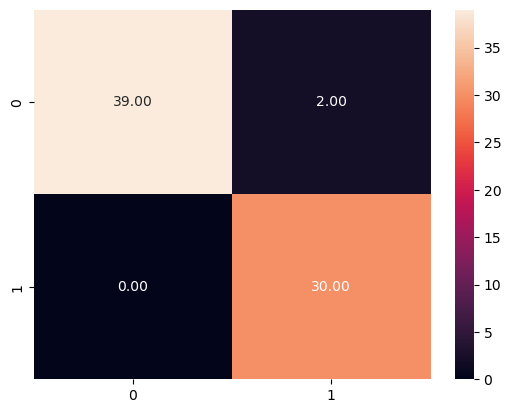

In [114]:
sns.heatmap(confusion_matrix(y_test, layer2.predict(X_test)), annot = True, fmt = ".2f")

<Axes: >

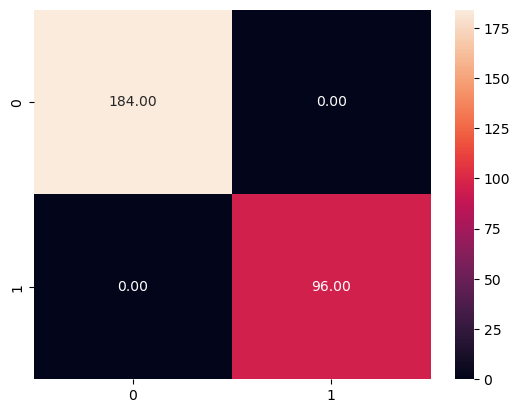

In [115]:
sns.heatmap(confusion_matrix(y_train, layer2.predict(X_train)), annot = True, fmt = ".2f")